## Introduction
Exploring the factbook.db taken from the GitHub.

In [10]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

# return information on th tables
q1 = "select * from sqlite_master where type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [11]:
# return the first 5 rows of the fact table
q2 = "select * from facts limit 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary statistic

In [13]:
# writing a single query that returns the: minimum population, 
# maximum population, minimum population growth, maximum population growth
q3 = "select min(population), max(population), min(population_growth), max(population_growth) from facts;"
pd.read_sql_query(q3, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


Let's zoom in on countries which have population of 0 and more than 7.2 billion people.

## Exploring the outliers

In [24]:
# country with population 0
q4 ='''
select *
from facts
where population == (select min(population) from facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [26]:
# country with population more than 7.2 billion people
q5 = '''
select *
from facts
where population == (select max(population) from facts);
'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It seems the table conatains a row for the mainland Antarctica, which explains population 0. And also, the table contains a row for the whole world, which explains population more than 7.2 billion.

## Histograms
for `population, population_growth, birth_rate, death_rate`

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f394b23e860>,
      dtype=object)

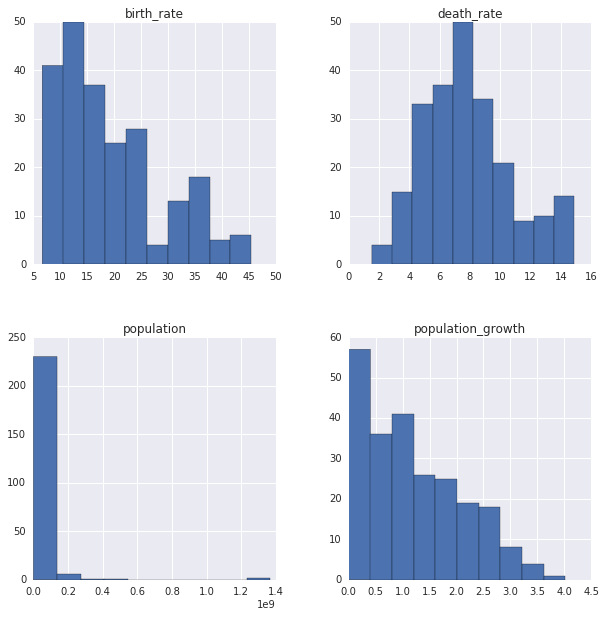

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population > (select min(population) from facts)
and population < (select max(population) from facts)
'''
pd.read_sql_query(q6, conn).hist(ax=ax)


## Exploring the population density

In [59]:
q7 = '''
select name, cast(population as float)/cast(area_land as float) as popul_density
from facts
where popul_density > 0
order by popul_density desc
limit 20;
'''
popul_density = pd.read_sql_query(q7, conn)
popul_density

,name,popul_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


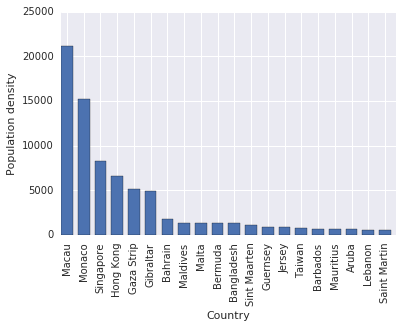

In [77]:
country = popul_density['name']
country_popul = popul_density['popul_density']

index = np.arange(20)
bar_width = 0.7

fig_pop, ax = plt.subplots()
ax.bar(index, country_popul, bar_width)
ax.set_xlabel("Country")
ax.set_ylabel("Population density")
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(country, rotation=90)

plt.show()